Aixa Xiuhyolotzin Andrade Hernández.

In [97]:
using PyPlot

### Ejercicio 1: El fractal de Newton

(Ejercicio tomado de un curso de David P. Sanders)

Este ejercicio tiene dos objetivos. Que implementen el método de Newton para una variable (real o compleja) para buscar ceros de una función $f(x)$ dando *también* su derivada, y que construyan un fractal usándolo.

Recordemos primero qué es el método de Newton (o Newton-Raphson) en una variable, para encontrar las raíces (ceros) de una función no lineal $f(x)$. El método de Newton es un método iterativo definido por:

$$
x_{n+1}=x_n−\frac{f(x_n)}{f′(x_n)},
$$

a partir de una *condición inicial* $x_0$ dada. (Cualquier libro de cálculo 1 es buena referencia para la construcción.) Lo importante es que $x_{n+1}$, se construye a partir del anterior, usando la función $f(x)$ (cuyas raíces queremos encontrar) y *también* su derivada $f'(x)$. 

El *teorema* dice que si $x_0$ está suficientemente cerca de $x^*$, donde $f(x^*)=0$, entonces $x_n \to x^*$ cuando $n\to\infty$.

1. Implementen una función para encontrar las raíces de una función arbitraria $f(x)$. En particular, consideren $f(x) = x^2 - 2$. (Para escribir $f'(x)$ con caracteres Unicode, simplemente escriba `f\prime<TAB>`.) *HINT:* Como a priori no sabemos si la condición inicial conviene o no, vale la pena poner un tope superior al número de iteraciones del método de Newton.

2. Usa el método de Newton para encontrar las raíces cúbicas de 1, o sea, $g(z) = z^3-1$. Empezando con una malla de condiciones iniciales $z_0$ (en el plano complejo), determina a donde converge cada condición inicial. Guarden los resultados en una matriz: $N_{i,j} = z_{end}(z_0)$, donde $(i,j)$ identifican el punto en la malla. (Algo importante es que en Julia las matrices se almacenan corriendo sobre los renglones, es decir, primero se almacena la primer columna, luego la segunda, etc. Saber esto puede hacer que logren hacer correr las cosas de manera *eficiente*.)

3. Grafiquen los resultados usando `imshow`, `pcolor` y/o `pcolormesh` definidos en `PyPlot`; lean la documentación para ver cómo usar la instrucción que ustedes elijan.

4. ¿Qué modificaciones puedes hacer para hacer ampliaciones? Haz un par de ejemplos. ¿Tiene sentido el uso de la palbra "fractal"?

(Pueden experimentar también con otras funciones complejas, otros polinomios, o `sin`.)

---

Se construye una derivada numérica para el método de Newton.

In [98]:
function derivada(f,x_0,h)

(f(x_0+h)-f(x_0))/h
end

derivada (generic function with 1 method)

Usando esta derivada se implementa el método de Newton.

In [99]:
function raices(f,x0,h)
    if abs(f(x0 - f(x0)/derivada(f,x0,h)))<h
        x0
    else
        xn=x0 - f(x0)/derivada(f,x0,h)
        raices(f,xn,h)
    end
end  

raices (generic function with 2 methods)

Probamos la función $raices$  para encontrar las raices de $f(x)=x^2-2$.

In [100]:
cuadrado(x)=x^2 -2

cuadrado (generic function with 1 method)

In [101]:
raices(cuadrado,0,.000001)

1.414233473790622

Encontramos el siguiente error para $x=\sqrt{2}$:

In [102]:
sqrt(2)-raices(cuadrado,0,.000001)

-1.99114175267745e-5

In [103]:
g(z)=z^3-1

g (generic function with 1 method)

Probemos el método para la función $g(z)=z^3 -1$. Es decir, buscamos las 3 raíces cúbicas de 1 que son: $$z_1=1,$$ $$z_2=-.5-.866i$$ y $$z_3=-.5+-866i$$.

In [104]:
raices(g,-.4-.8im,.00001)

-0.5001594341108407 - 0.8658016284493428im

In [105]:
raices(g,-.1+.1im,.00001)

-0.500093314429312 + 0.866015137062481im

Para $x_0=0$, $g'(x_0)=0$ $--->$ $\frac{1}{g'(x_0)}$ se indefine, entonces usamos la función $raiz(g,x0,h)$: 

In [106]:
function raiz(f,x0,h)
    if derivada(f,x0,h)==0
         x=-.1-.1*im
        if abs(f(x - f(x)/derivada(f,x0,h)))<h
            x
        else
            xn=x - f(x)/derivada(f,x0,h)
            raiz(f,xn,h)
        end
    else
          if abs(f(x0 - f(x0)/derivada(f,x0,h)))<h
            x0
        else
        xn=x0 - f(x0)/derivada(f,x0,h)
        raiz(f,xn,h)
        end
    end
end

raiz (generic function with 1 method)

In [107]:
raices(g,0,.00001)

1.0001435963529983

Sí funcionó!

Hacemos la función $matrix_r$ para darle condiciones iniciales complejas al método de Newton.

In [108]:
function matriz_r(funcion,h,n)
M=[i+j*im for i in -n:h:n, j in -n:h:n]
    a=length([-n:h:n])
    M_raices=[raiz(funcion,M[i,j],h) for i in 1:a, j in 1:a]
end

matriz_r (generic function with 1 method)

In [109]:
aix=matriz_r(g,.1,10);

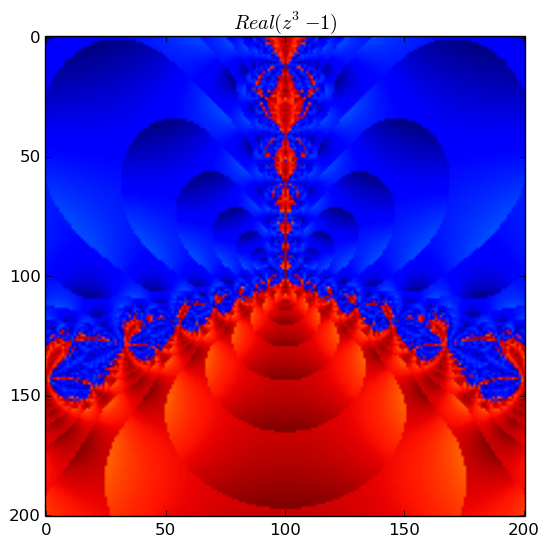

PyObject <matplotlib.text.Text object at 0x7ff02431b710>

In [112]:
imshow(real(aix))
title(L"$Real(z^3-1)$")

Podemos ver la convergencia a las raices de $g(z)=z^3-1$, cada tono de color implica un valor obtenido para una raíz, las zonas de un sólo color muestran una mejor convergencia del método.

### Ejercicio 2: Operadores como funciones

- ¿Qué pasa si sumas dos cadenas (*strings*)?

- ¿Qué pasa si multiplicas dos cadenas (*strings*)?

- Contruye una función *específica* que sume dos cadenas

---

In [111]:
"ho"*"la"

"hola"

In [15]:
import Base.+
+(a::String, b::String) = a*b

+ (generic function with 143 methods)

In [16]:
"aixa"+"andrade"

"aixaandrade"



### Ejercicio 3: Diferenciación automática

En clase vimos cómo definir estructuras "tipo" (*types*), y los conceptos básicos atrás de los `Duales` que sirven para implementar la diferenciación automática. 

El objetido de este ejercicio es que construyan un *módulo* (*llamado AutDiff en un archivo llamado AutDiff.jl*) que permita calcular primeras derivadas de manera más exacta que permita la computadora, o sea, que el error sea del orden del *epsilon* local de la máquina.

1. Define el tipo (estructura) `Dual` (**con exactamente ese nombre**) que contenga dos campos, el valor de la función y el valor de su derivada. Haz que *ambos* campos tengan el mismo tipo de valor, y que ambos *tengan* que ser un subtipo de `Real`.

- Define métodos para que el dual de un número (sólo *un* número) sea lo que uno espera, y una función `dual_var(x0)` que retorne un dual que represente a la variable *independiente* en `x0`.

- Define métodos que sumen, resten, multipliquen y dividan duales, y números con duales. Incluye los casos (para duales) en que los operadores `+` y `-` actúan sólo sobre un `Dual`.

- Incluye extensiones de las funciones elementales más usuales (`^`, `exp`, `log`, `sin`, `cos`, `sqrt`, etc).


Se definieron las estructuras duales para reales y Duales para complejos en los módulos AD.jl y  AD_complex.jl respectivamente. Así como también las funciones $dual\_var(x_0)$ y $Dual\_var(x_0)$ y se implementaron operaciones elementales y funciones trigonométricas.

In [7]:
using AD

    ^(dual,Real) at /home/malaika/AIX/MATERIAS/2016-1/temas_selectos_compu_aix/2016-1_TemasSelectosFisComp/tareas/Aixa_Andrade/AD.jl:51
is ambiguous with: 
    ^(Any,Integer) at intfuncs.jl:86.
To fix, define 
    ^(dual,Integer)
before the new definition.


In [8]:
using AD_complex

    ^(Dual{T<:Number},Real) at /home/malaika/AIX/MATERIAS/2016-1/temas_selectos_compu_aix/2016-1_TemasSelectosFisComp/tareas/Aixa_Andrade/AD_complex.jl:61
is ambiguous with: 
    ^(Any,Integer) at intfuncs.jl:86.
To fix, define 
    ^(Dual{T<:Number},Integer)
before the new definition.



- Muestra que el error numérico de lo que has hecho es esencialmente el epsilon de la máquina. Para esto define alguna función $f(x)$ y aplícala sobre `x = dual_var(x0)`, y muestra que el error es del orden del epsilon de la máquina al rededor del valor verdadero de la derivada.

In [22]:
f(x)=x^2

f (generic function with 1 method)

$$f(x)=x^2$$

$$f(dual\_var(x_0))=dual(f(x_0),f'(x_0))$$ 

$$f(dual\_var(x_0))=dual(x_0^2,2x_0) $$

$$f(dual\_var(3))=dual(9,6)$$

In [14]:
f(dual_var(3))

dual(9,6)

El épsilon de la máquina evaluado en la componente derivada del dual  menos el valor de la derivada teórico es el épsilon de la máquina de cero.  

In [11]:
eps(f(dual_var(3)).d_f-6.0)

5.0e-324

In [12]:
eps(0.0)

5.0e-324

Entonces tenemos un error del orden del épsilon de la máquina.

Sólo se comprobó el error del tipo $dual$ porque $eps$ no tiene métodos para complejos.


- Extiende la función para el método de Newton para que funcione sólo dando la función, y que la derivada la obtenga usando las herramientas del módulo.


Análogamente al ejercicio 1, definimos dos funciones que implementan el método de Newton, la segunda funciona para $f'(x_0)=0$. 

In [53]:
function newton(f,x0)

    
    f_x0=f(Dual_var(x0))
  
    if abs(f(x0 - f_x0.x/f_x0.y))<1e-15 
        x0
    else
        
        xn=x0 - f_x0.x/f_x0.y
       
        newton(f,xn)
        
   
        
    end
end 

newton (generic function with 1 method)

In [63]:
function newton_2(f,x0)
f_x0=f(Dual_var(x0))
    
        if f_x0.y==0
        x=x0.01+.01im
        f_x=f(Dual_var(x))
  
    if abs(f(x - f_x.x/f_x.y))<1e-15
        x
    else
        xn=x - f_x.x/f_x.y
       newton_2(f,xn)
    end
        else
         if abs(f(x0 - f_x0.x/f_x0.y))<1e-15
        x0
    else
        xn=x0 - f_x0.x/f_x0.y
        newton_2(f,xn)
    end
    end
        
        
end 

newton_2 (generic function with 1 method)

Nuevamente probamos para las raíces de $g(z)=z^3-1$

In [58]:
newton_2(g,-.4-.8im)

-0.5000000000000044 - 0.866025403784435im

In [59]:
newton_2(g,-.1+.1im)

-0.5000000026675202 + 0.8660253953741468im

In [61]:
newton_2(g,0.0)

1.000000000046747 - 5.177139458693271e-13im

Como se esperaba, se obtiene una mejor aproximación a las raices teóricas.

La función $matriz$ crea una malla compleja de condiciones iniciales y aplica el método de newton para cada una de ellas.

In [64]:
function matriz(funcion,h,n)
M=[i+j*im for i in -n:h:n, j in -n:h:n]
    a=length([-n:h:n])
    M_raices=[newton_2(funcion,M[i,j]) for i in 1:a, j in 1:a]
end

matriz (generic function with 1 method)

In [74]:
a=matriz(g,1,400);

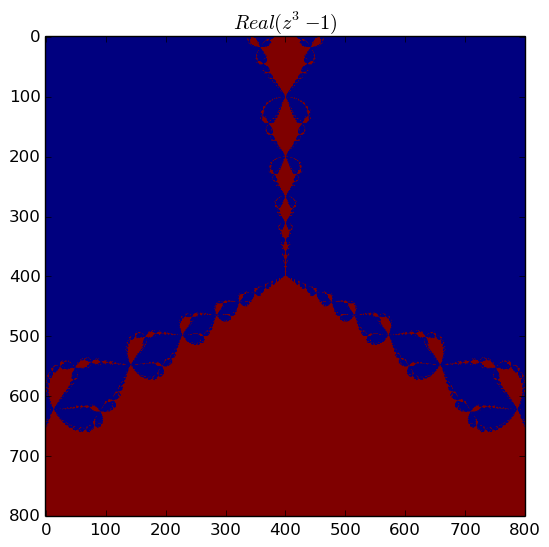

PyObject <matplotlib.text.Text object at 0x7ff0241b0dd0>

In [113]:
imshow(real(a))

title(L"$Real(z^3-1)$")

Se observa una mejor convergencia a las raices pues ahora tenemos menos colores y texturas, es decir obtuvimos una buena aproximación en cada una de las iteraciones.

In [75]:
h(z)=z^2+z^5+1

h (generic function with 1 method)

In [78]:
b=matriz(h,1,400);

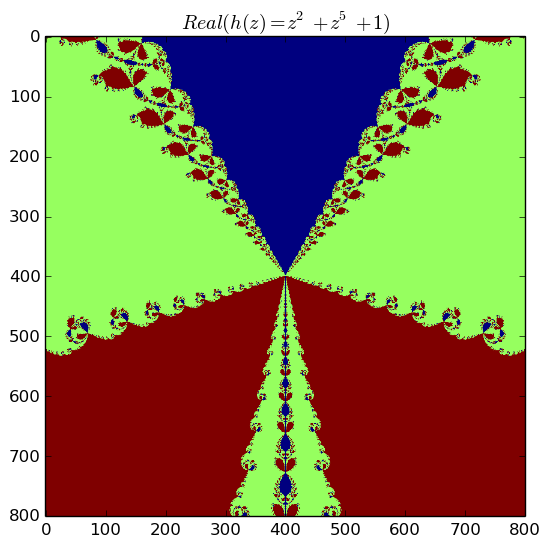

PyObject <matplotlib.text.Text object at 0x7ff0241c2950>

In [114]:
imshow(real(b))

title(L"$Real(h(z)=z^2+z^5+1)$")

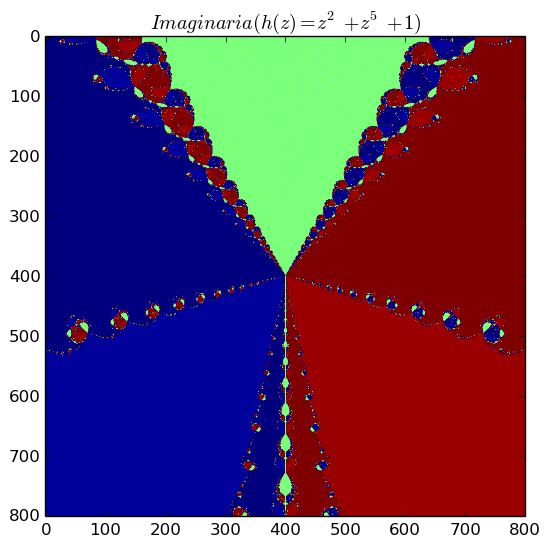

PyObject <matplotlib.text.Text object at 0x7ff023ecfd50>

In [119]:
imshow(imag(b))

title(L"$Imaginaria(h(z)=z^2+z^5+1)$")

In [80]:
s(x)=sin(x)

s (generic function with 1 method)

In [84]:
diegui=matriz(s,.001,1);

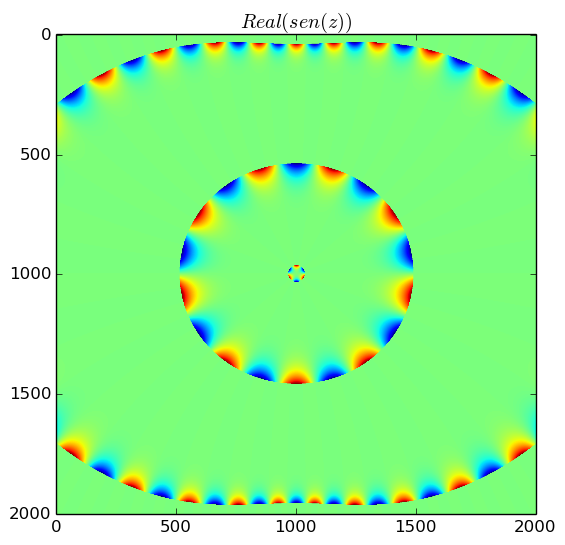

PyObject <matplotlib.text.Text object at 0x7ff024002450>

In [115]:
imshow(real(diegui))

title(L"$Real(sen(z))$")

In [116]:
c(x)=cos(x)-1

c (generic function with 1 method)

In [117]:
hola=matriz(c,.001,1);

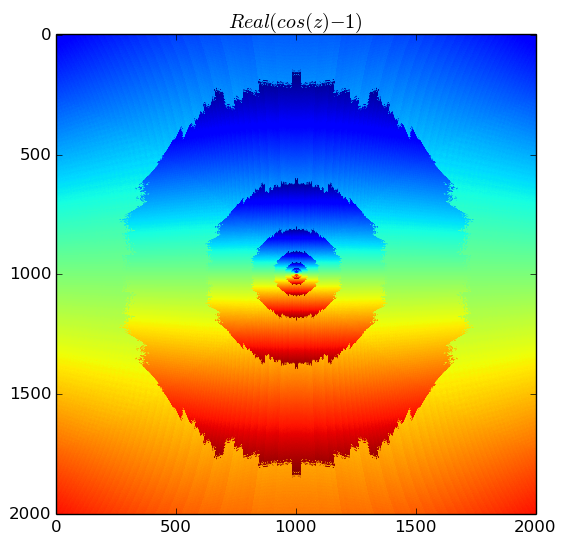

PyObject <matplotlib.text.Text object at 0x7ff023f12e10>

In [118]:
imshow(real(hola))

title(L"$Real(cos(z)-1)$")